Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


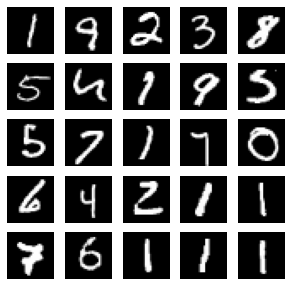

In [63]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, plot_model

# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [64]:
def predict(x, predictor):
    # Get the data from the test set
    # Get output of network and prediction
    activations = predictor.predict(x.reshape(1, 28, 28, 1))
    prediction = np.argmax(activations)
    # Print the prediction of the network
    print('Network output: ')
    print(activations)
    print('Network prediction: ')
    print(prediction)
    print('Actual image: ')
    # Draw the image
    plt.bar(range(10), activations[0])
    plt.show()
    plt.imshow(x.reshape((28,28)), cmap='Greys')
    plt.show()

In [65]:
import keras.layers as l
import keras.models as m
import keras.optimizers as o
import tensorflow as tf 

Input = l.Input(shape=(28, 28, 1))
hidden = l.Flatten()(Input)
output = l.Dense(10, activation='softmax')(hidden)

classifier = m.Model(Input, output)
classifier.summary()
classifier.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=["accuracy"]
)

classifier.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test)
)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
938/938 [==============================] - 3s 3ms/step - loss: 0.5432 - accuracy: 0.8620 - val_loss: 0.3333 - val_accuracy: 0.9122
Epoch 2/50
938/938 [==============================] - 2s 2ms/step - loss: 0.3243 - accuracy: 0.9101 - val_loss: 0.2938 - val_accuracy: 0.9198
Epoch 3/50
938/938 [=================

Network output: 
[[9.9973208e-01 8.6715825e-17 1.0304635e-05 4.6613337e-08 7.6149398e-08
  4.1892679e-05 2.0175775e-04 5.1151938e-10 7.8583871e-06 5.9906051e-06]]
Network prediction: 
0
Actual image: 


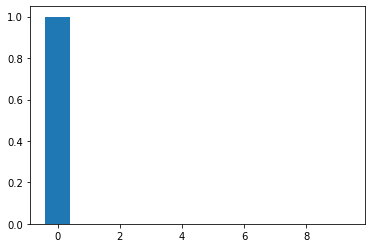

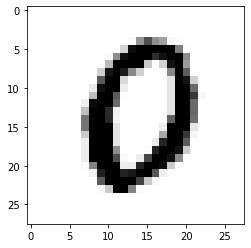

In [5]:
predict(x_test[312], classifier) #2460, 312

In [6]:
import keras.layers as l
import keras.models as m
import tensorflow as tf 

Input = l.Input(shape=(28, 28, 1))
hidden = l.Conv2D(32, (3,3), padding='same', activation="relu")(Input)
hidden = l.MaxPooling2D((3,3))(hidden)
hidden = l.Conv2D(64, (3,3), padding='same', activation="relu")(hidden)
hidden = l.MaxPooling2D((3,3))(hidden)
hidden = l.Conv2D(128, (3,3), padding='same', activation="relu")(hidden)
hidden = l.MaxPooling2D((3,3))(hidden)
hidden = l.Flatten()(hidden)
output = l.Dense(10, activation='softmax')(hidden)

classifier = m.Model(Input, output)
classifier.summary()
classifier.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),    
    metrics=["accuracy"]
)

classifier.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=2,
    validation_data=(x_test, y_test)
)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         7385

Network output: 
[[1.9017737e-06 3.1971674e-09 1.8478447e-07 4.3631968e-07 4.0386973e-07
  9.9806613e-01 1.3740198e-04 3.6171230e-08 2.9442640e-04 1.4990828e-03]]
Network prediction: 
5
Actual image: 


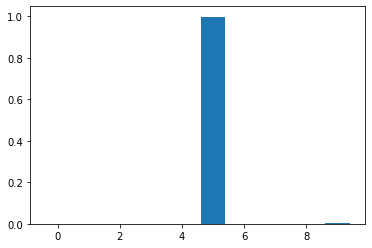

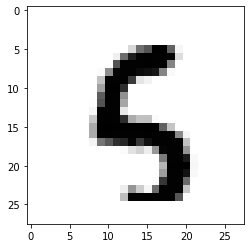

In [7]:
predict(x_test[2460], classifier) #2460, 312

In [23]:
import tensorflow as tf

classifier.trainable = False

Input = l.Input(shape=(1,))
hidden = l.Dense(256, activation="relu")(Input)
hidden = l.Dense(28*28, activation="sigmoid")(hidden)
output = l.Reshape((28, 28))(hidden)

advModel = m.Model(Input, output)
advModel.compile(
    loss='mean_squared_error',
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

wholeModel = m.Model(Input, classifier(output))
wholeModel.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(learning_rate=0.009),
    metrics=["accuracy"]
)

advModel.summary()
wholeModel.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_4 (Dense)             (None, 256)               512       
                                                                 
 dense_5 (Dense)             (None, 784)               201488    
                                                                 
 reshape_1 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 202,000
Trainable params: 202,000
Non-trainable params: 0
_________________________________________________________________
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None,

In [60]:
from tqdm import tqdm

for _ in tqdm(range(1000)):
    advModel.train_on_batch([np.array([1])], np.array([x_test[4]]))
    wholeModel.train_on_batch([np.array([1])], np.array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 32.99it/s]


Network output: 
[[9.7828843e-06 1.0218660e-05 1.7758943e-03 2.7014678e-02 2.4443489e-05
  2.0543291e-04 1.1323808e-08 6.8378872e-01 2.8457674e-01 2.5940328e-03]]
Network prediction: 
7
Actual image: 


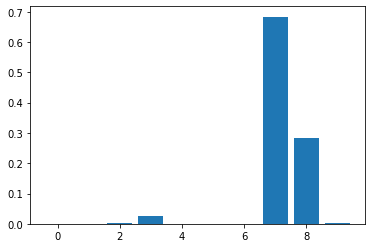

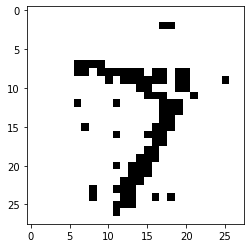

Network output: 
[[2.2798746e-07 7.3829835e-07 1.4496438e-05 1.3729422e-06 9.8522328e-08
  1.2196483e-07 2.2813366e-12 9.9995005e-01 6.7461929e-07 3.2198026e-05]]
Network prediction: 
7
Actual image: 


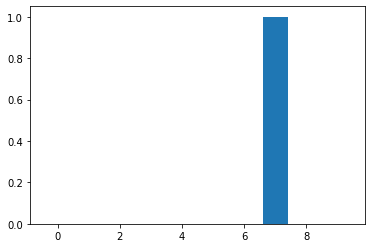

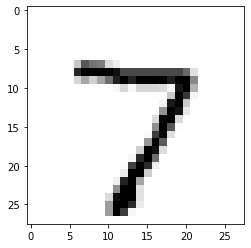

In [61]:
advImage = advModel.predict([np.array([1])]).reshape(1, 28, 28, 1)
predict(advImage, classifier)
predict(x_test[0], classifier)